<hr style="border-width:2px;border-color:#75DFC1">
<center><h1>Projet Fil Rouge CO2</h1></center>
<center><h2>Data visualisation</h2></center>
<hr style="border-width:2px;border-color:#75DFC1">

Anthony et Isabelle - mentor Maxime

Le but de ce projet est d'identifier les caractéristiques techniques des véhicules qui jouent un rôle dans l'émission de CO2 à partir d'une base de données produite par l'Agence européenne de l'environnement qui contient la liste des voitures particulières enregistrés en France pour l'année 2019.

Ce document présente les scripts de Data visualisation appliqués aux datasets qui recensent le parc automobile (véhicules immatriculés en France en 2019) et les véhicules uniques (véhicules neufs acquis par au moins une personne en France en 2019). Lorsque le dataset utilisé pour un graphique n'est pas précisé, il s'agit par défaut du dataset "cars_viz" => véhicules uniques.



> La structure du notebook est la suivante : 
>> I - [Préparation à la Data visualisation](#preparation)
>> 
>>  - Création du dataset “parc_viz” (=> véhicules neufs immatriculés en France en 2019) à partir du jeu de données source.
>>  - Création du dataset “cars_viz” (=> véhicules neufs acquis par au moins une personne en France en 2019) à partir du jeu de données source en supprimant les doublons sur un identifiant véhicule.
>>  - Création des variables moy_CO2_nedc et moy_CO2_wltp : moyenne de CO2 par type de carburants, pour les normes NEDC et WLTP.
>>  - Création des variables type_cars et type_parc : nombre de véhicules par type de carburant (en %), pour les deux datasets.
>>  - Remplacement du nom des modalités de la variable 'Fm'
>>  - Remplacement du nom des variables pour plus de lisibilité
>>
>> II - [Graphiques pour la Data visualisation](#graphiques)
>>
>> - [Graphique 1](#graphique1) : Emissions de CO2 en fonction du type de carburant selon les normes WLTP et NEDC
>> - [Graphique 2](#graphique2) : Proportion des différents types de carburants au sein du parc automobile et du dataset de véhicules uniques
>> - [Graphique 3](#graphique3) : Emissions de CO2 en fonction du mode de carburation
>> - [Graphique 4](#graphique4) : Emissions de CO2 en fonction des différentes marques de véhicule
>> - [Graphique 5](#graphique5) : Matrice de corrélation entre les variables de masse, cylindrée, puissance moteur, largeur de voies d’essieux, d’empattement et d’émissions de CO2 (WLTP)

## Import des librairies

In [47]:
# import des librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## <a name="preparation"></a> Préparation à la Data visualisation

In [48]:
# lecture du fichier de véhicules immatriculés en France en 2019 (données extraite du site de l'AEE)
parc = pd.read_csv('data_FR2019.csv', index_col=0, dtype={'Cn': 'str', 'IT': 'str'})
# lecture du datasets "cars" à partir du jeu de données source en supprimant les doublons sur un identifiant véhicule.
cars = pd.read_csv('cars_FR2019.csv', dtype={'Cn': 'str', 'IT': 'str'},index_col=0)

In [49]:
# Création des DataFrames "cars_viz" et "parc_viz" et suppression des véhicules avec type de carburant inconnu
cars_viz = cars[(cars['Ft']!='unknown')]
parc_viz = parc[(parc['Ft']!='unknown')]

In [50]:
# Création de la variable d'émission moyenne de CO2 (norme NEDC) par type de carburant
moy_CO2_nedc = cars_viz['Enedc (g/km)'].groupby(cars_viz['Ft']).mean()
# Création de la variable d'émission moyenne de CO2 (norme WLTP) par type de carburant
moy_CO2_wltp = cars_viz['Ewltp (g/km)'].groupby(cars_viz['Ft']).mean()

In [51]:
# Création des variables type_cars et type_parc : nombre de véhicules par type de carburant (en %)
type_cars = cars_viz['Ft'].value_counts(normalize=1)
type_cars *= 100
type_parc = parc_viz['Ft'].value_counts(normalize=1)
type_parc *= 100
type_cars = type_cars.sort_index()
type_parc = type_parc.sort_index()

In [52]:
# Remplacement du nom des modalités de la variable 'Fm'
cars_viz['Fm'] = cars_viz['Fm'].replace(('M', 'H', 'P', 'B', 'F'), ('Mono-fuel', 'Hybrid not off-charged',
                                                                    'Hybrid off-charged', 'Bi-fuel', 'Flex-fuel'))

# Renommer les variables pour la lisibilité des graphiques
viz_rename = {'m (kg)': 'Masse en kg',
        'ec (cm3)': 'Cylindrée en cm3',
        'ep (KW)': 'Puissance moteur en KW',
        'Enedc (g/km)': 'Emissions de CO2 en g/km',
        'W (mm)': 'Empattement en mm',
        'At1 (mm)': "Largeur de voie essieu directeur (mm)",
        'At2 (mm)': "Largeur de voie autre essieu (mm)"}
cars_viz = cars_viz.rename(viz_rename,axis=1)

C:\Users\lebre\AppData\Local\Temp\ipykernel_28892\1570255797.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_viz['Fm'] = cars_viz['Fm'].replace(('M', 'H', 'P', 'B', 'F'), ('Mono-fuel', 'Hybrid not off-charged',


## <a name="graphiques"></a> Graphiques pour la Data visualisation

### <a name="graphique1"></a>  Graphique 1 : Emissions de CO2 en fonction du type de carburant selon les normes WLTP et NEDC

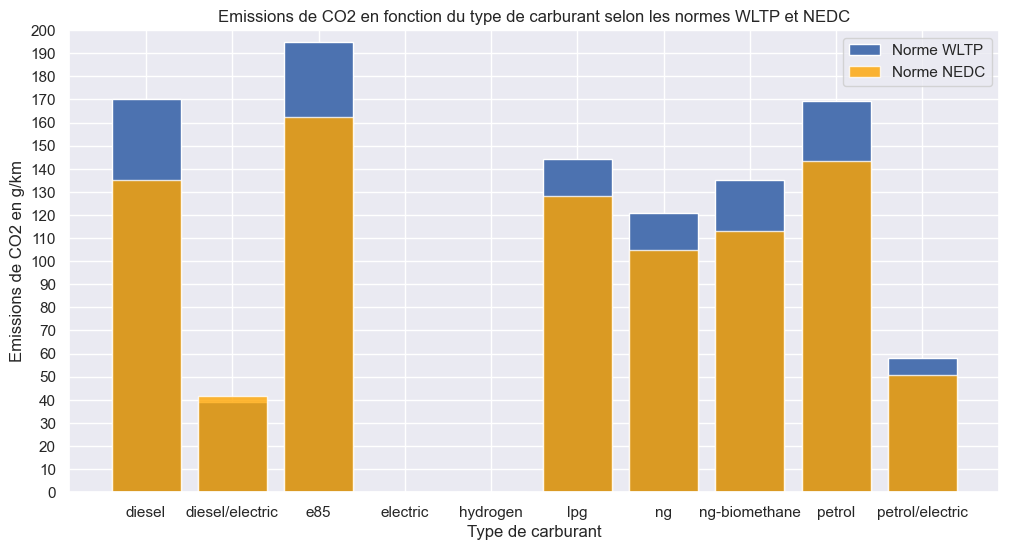

In [53]:
# Définition du style, police et taille de figure
sns.set_style('darkgrid')
sns.set_context('notebook')
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1, 1, 1)

# Définition de l'échelle en ordonnée
ax.set_yticks(np.arange(0, 201, 10))

# Diagramme en barres superposées
plt.bar(x=moy_CO2_wltp.index, height=moy_CO2_wltp.values, label = 'Norme WLTP')
plt.bar(x=moy_CO2_nedc.index, height=moy_CO2_nedc.values, label = 'Norme NEDC', color='orange', alpha=0.8)
plt.ylim([0, 200])
plt.xlabel('Type de carburant')
plt.ylabel('Emissions de CO2 en g/km')
plt.title('Emissions de CO2 en fonction du type de carburant selon les normes WLTP et NEDC')
plt.legend();

### <a name="graphique2"></a>   Graphique 2 : Proportion des différents types de carburants au sein du parc automobile et du dataset de véhicules uniques

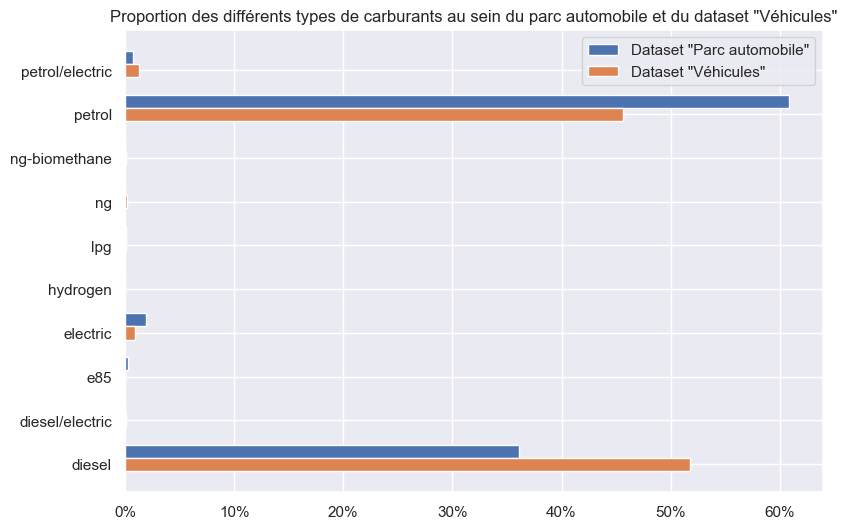

In [54]:
# Définition du style, police et taille de figure
sns.set_style('darkgrid')
sns.set_context('notebook')
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(1, 1, 1)

# Diagramme en barres horizontales juxtaposées
barheight=0.3
x1=range(10)
x2=[element + barheight for element in x1]
plt.barh(width=type_parc.values, y=x2, label='Dataset "Parc automobile"', height=barheight)
plt.barh(width=type_cars.values, y=type_cars.index, label='Dataset "Véhicules"' , height=barheight)
plt.xticks([0, 10, 20, 30, 40, 50, 60], ['0%', '10%', '20%', '30%', '40%', '50%', '60%'])
plt.title('Proportion des différents types de carburants au sein du parc automobile et du dataset "Véhicules"')
plt.legend();

### <a name="graphique3"></a>   Graphique 3 : Emissions de CO2 en fonction du mode de carburation

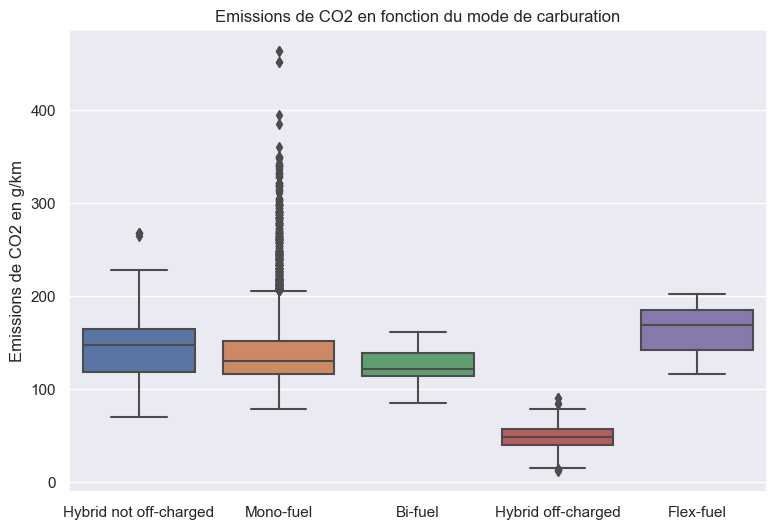

In [55]:
# Suppression des véhicules électriques et hydrogènes (ne rejettent pas de CO2)
cars_viz = cars_viz[(cars_viz['Ft']!='electric') & (cars_viz['Ft']!='hydrogen') & (cars_viz['Ft']!='unknown')]

# Définition du style, police et taille de figure
sns.set_style('darkgrid')
sns.set_context('notebook')
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(1, 1, 1)

# Diagramme en boîtes (Boxplot)
sns.boxplot(x=cars_viz['Fm'], y=cars_viz['Emissions de CO2 en g/km'])
plt.xlabel(None)
plt.title('Emissions de CO2 en fonction du mode de carburation');

### <a name="graphique4"></a>   Graphique 4 : Emissions de CO2 en fonction des différentes marques de véhicule

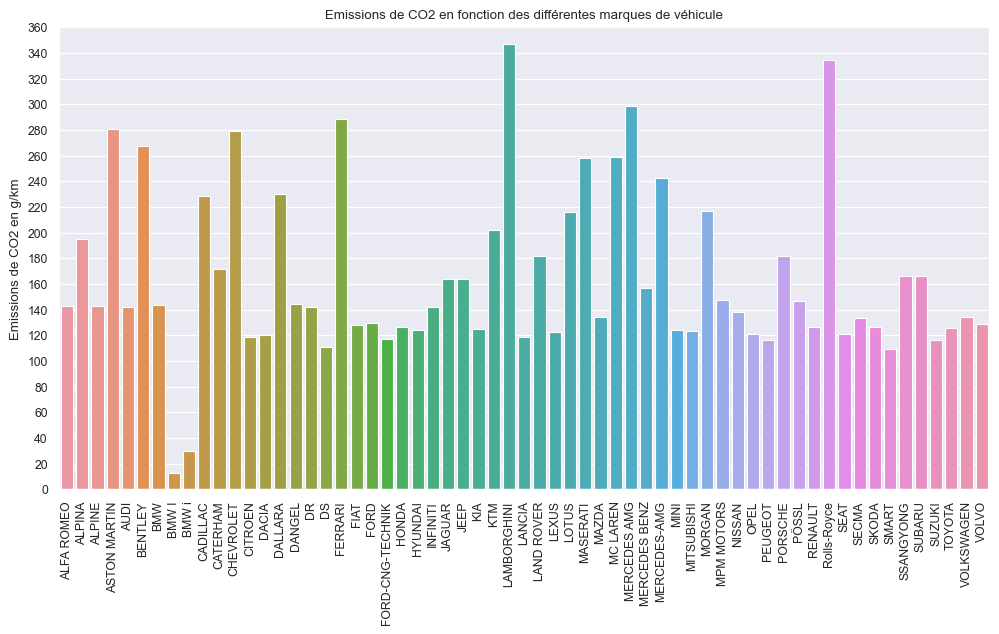

In [56]:
# Création de la variable moy_CO2_mk : Emission moyenne de CO2 par marque de véhicule
moy_CO2_mk = cars_viz['Emissions de CO2 en g/km'].groupby(cars_viz['Mk']).mean()

# Définition du style, police et taille de figure
sns.set_style('darkgrid')
sns.set_context('paper')
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1, 1, 1)

# Définition de l'échelle en ordonnée
ax.set_yticks(np.arange(0, 361, 20))

# Diagramme en barre
sns.barplot(x=moy_CO2_mk.index, y=moy_CO2_mk.values)
plt.ylim(0,360)
plt.xticks(rotation=90)
plt.xlabel(None)
plt.ylabel('Emissions de CO2 en g/km')
plt.title('Emissions de CO2 en fonction des différentes marques de véhicule');

### <a name="graphique5"></a>   Graphique 5 : Matrice de corrélation entre les variables de masse, cylindrée, puissance moteur, largeur de voies d’essieux, d’empattement et d’émissions de CO2 (WLTP)

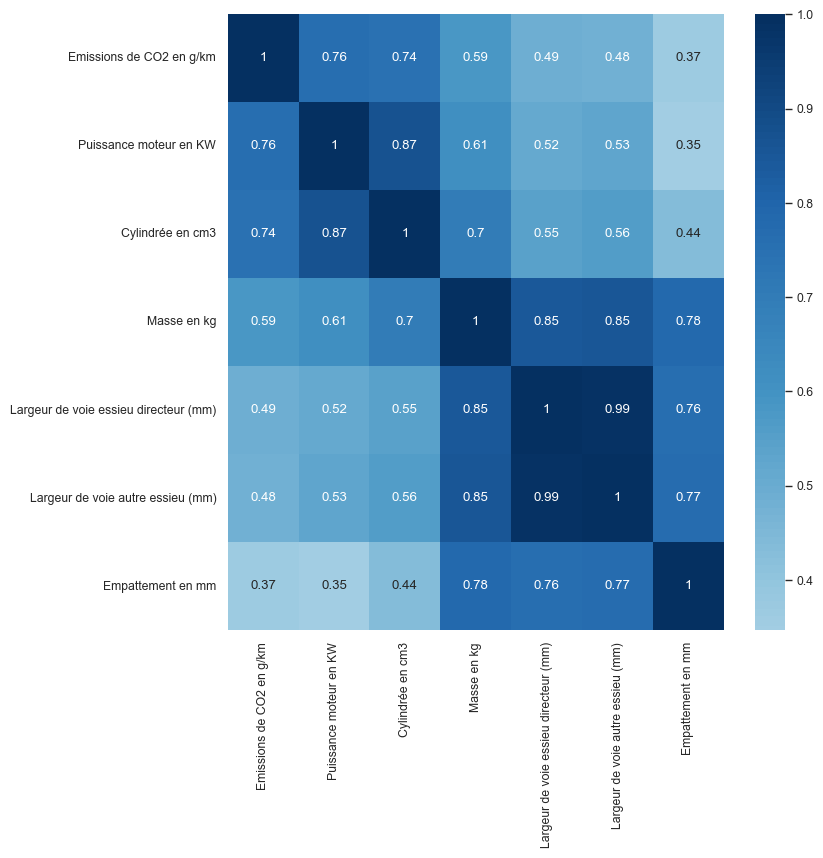

In [57]:
plt.figure(figsize=(8,8))
sns.heatmap(cars_viz[['Emissions de CO2 en g/km','Puissance moteur en KW','Cylindrée en cm3','Masse en kg',
                  'Largeur de voie essieu directeur (mm)','Largeur de voie autre essieu (mm)',
                  'Empattement en mm']].corr(), annot=True, cmap = 'RdBu', center=0);

### Bonus : Graphiques non implémentés dans le rapport final

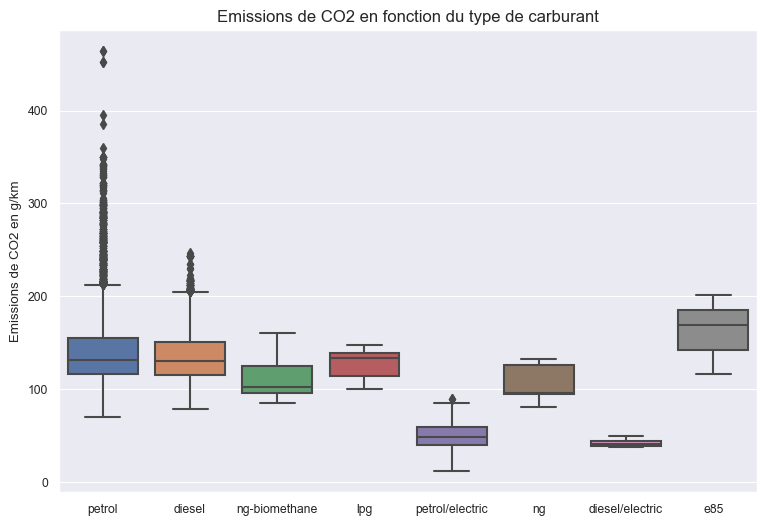

In [58]:
# Graphique : Emissions de CO2 en fonction du type de carburant
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(1, 1, 1)
sns.set_style('darkgrid')
sns.set_context('notebook')
sns.boxplot(x=cars_viz['Ft'], y=cars_viz['Emissions de CO2 en g/km'])
plt.xlabel(None)
plt.title('Emissions de CO2 en fonction du type de carburant');

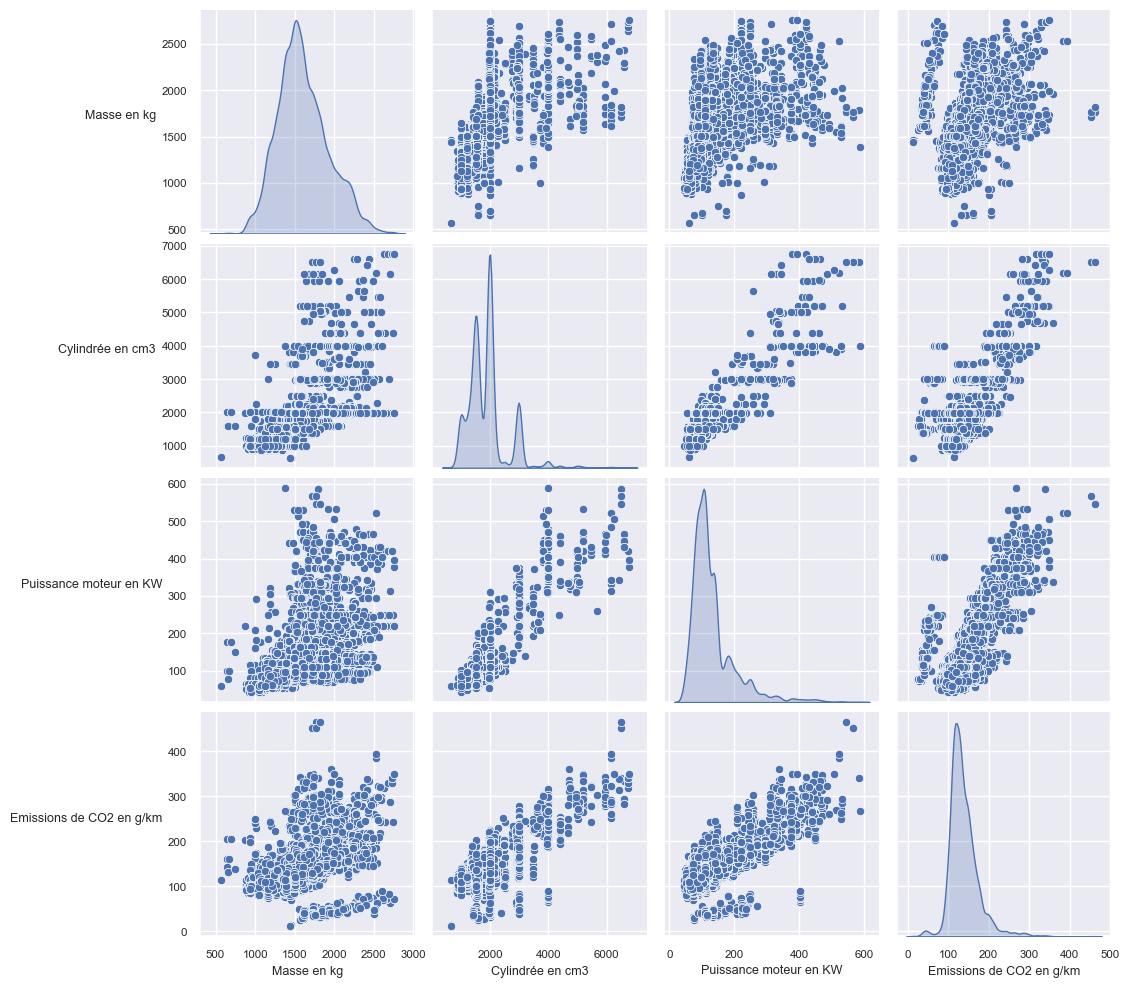

In [59]:
# Graphique : Corrélation par paire entre les variables de masse, cylindrée, puissance moteur et emissions de CO2 (WLTP)
sns.set(font_scale=0.75)
g=sns.pairplot(data=cars_viz[['Masse en kg', 'Cylindrée en cm3', 'Puissance moteur en KW', 'Emissions de CO2 en g/km']],
               diag_kind='kde')

for axes in g.axes.flat:
     axes.set_ylabel(axes.get_ylabel(), rotation=0, horizontalalignment='right')


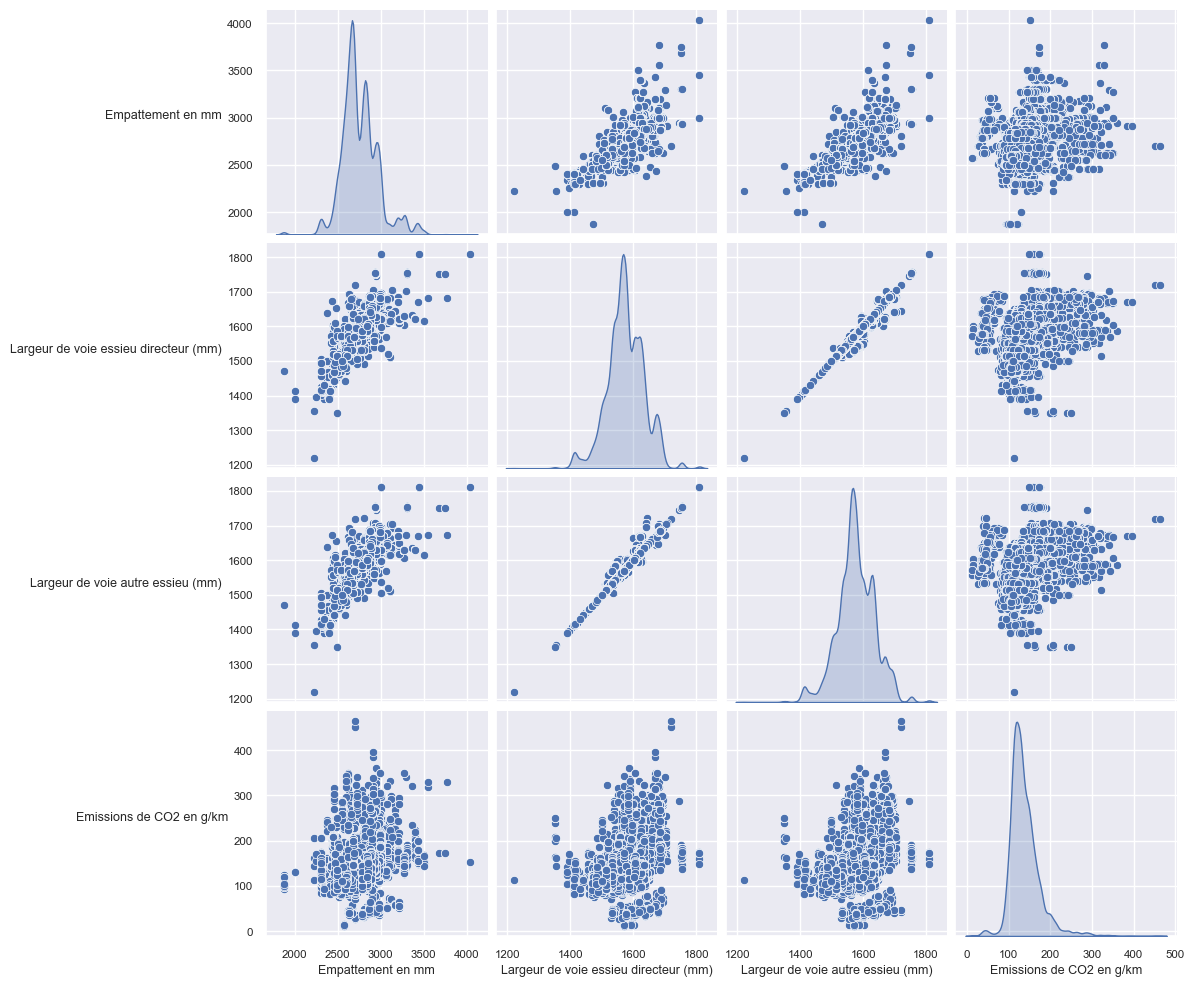

In [60]:
# Graphique : Corrélation par paire entre les variables d'empattement et de largeur de voie des deux essieux 
sns.set(font_scale=0.75)
g2=sns.pairplot(cars_viz[['Empattement en mm', "Largeur de voie essieu directeur (mm)",
                   "Largeur de voie autre essieu (mm)", 'Emissions de CO2 en g/km']], diag_kind = 'kde')

for axes in g2.axes.flat:
     axes.set_ylabel(axes.get_ylabel(), rotation=0, horizontalalignment='right')
